### Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. В даном исследовании мы разберемся как влияет семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.
______
В данном исследовании представлен процесс предобработки информации с последующим использованием очищенных данных для формирования выводов. Процесс предобработки информации представлен в виде пошаговых действий по постепенному повышению пригодности данных к использованию. Выводы непосредственно привязаны к поставленным заказчиком задачам. 
______

Данное исследование разделено на несколько частей.
Часть 1. Изучение общей информации
1. Импорт необходимой библиотеки для работы с данными, загрузка датасета
2. Изучение файлов с данными, получение общей информации

Часть 2. Предобработка данных
1. Обработка пропусков
2. Замена типа данных
3. Обработка дубликатов
4. Лемматизация
5. Категоризация данных

Часть 3. Ответы на вопросы поставленные заказчиком
1. Исследование зависимости между наличием детей и возвратом кредита в срок
2. Исследование зависимости между семейным положением и возвратом кредита в срок
3. Исследование зависимости между уровнем дохода и возвратом кредита в срок
4. Исследование как цели кредита влияют на его возврат в срок

Часть 4. Общий вывод

### Часть 1. Изучение общей информации.

<a id='Импорт необходимой библиотеки для работы с данными, загрузка датасета'></a>

 #### Импорт необходимой библиотеки для работы с данными, загрузка датасета

In [2]:
import pandas as pd
raw_data = pd.read_csv('/datasets/data.csv')

<a id='Изучение файлов с данными, получение общей информации'></a>

#### Изучение файлов с данными, получение общей информации

бросается в глаза 401755(!!!) отработанных дней - а это 1100 лет примерно
также стоит отметить наличие 20(!) детей и наличие отрицательного количества детей (-1)

In [3]:
raw_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


ознакомление с информацией, на данном этапе вроде бы все нормально, замечены пропуски в days_employed и total_income

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


при ближайшем рассмотрении выявлено еще несколько трудоголиков, и наоборот, людей с отрицательным стажем

In [5]:
raw_data.head(50) 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


#### Вывод

Обнаружены пропущенные значения в столбцах days_employed и total_income, связанные, возможно, с тем, что не работавший до этого человек не вносил данные вообще(не работал ни дня, поэтому и денег не заработал), либо эти значения считаются функциями или формулами, и, соответственно, проблемы в них. 
Отрицательные и огромные положительные значения в days_employed также, предположительно, связаны с функциями или формулами, считающими и передающими эти значения.
Отрицательное количество детей это, скорее всего, опечатка пользователя, вводящего данные.
Типы данных ячеек в общем случае соответсвуют назначениям ячеек, возможно следует поменять тип данных ячеек в столбцах days_employed и total_income с float64 на int64, либо округлить занчения в столбце total_income до 2 знаков после запятой(до копеек).

### Часть 2. Предобработка данных

<a id='Обработка пропусков'></a>

#### Обработка пропусков

видим, что количество пропущенных ячеек в days_employed - 2174, что не так много, меньше одного процента

In [6]:
raw_data[raw_data['days_employed'].isnull()].count()

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

заполняем отсутствующие значения в столбце нулями, исходя из предположения, что пользователи, не проработали ни дня

In [7]:
raw_data['days_employed'] = raw_data['days_employed'].fillna(0)

проверяем правильность заполнения столбца days_employed, заодно видим пропуски в столбце total_income    

In [8]:
raw_data[raw_data['total_income'].isnull()].count()

children            2174
days_employed       2174
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64

заполняем отсутствующие значения в столбце нулями, исходя из предположения, что пользователи не проработали ни дня

In [9]:
raw_data['total_income'] = raw_data['total_income'].fillna(0)

теперь у нас заполнены все ячейки

In [10]:
raw_data[raw_data['total_income'].isnull()].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

проверяем что у нас получилось

In [11]:
raw_data.head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


#### Вывод

В ходе анализа были обнаружены пропущенные ячейки в столбцах days_employed и total_income. Причинами появления пропусков могут быть как не полностью введенные пользователем данные, так и ошибки, связанные с работой функций или формул, расчитывающих эти данные. Пропуски были заполнены нулями с помощью метода fillna() исходя из предположения, что у данных пользователей полностью отсутствует опыт работы и, соответственно, ежемесячный доход. Результат был проверен методом isnull(). Таким образом было произведено первичное знакомство с данными, данные нуждаются в предобработке.

<a id='Замена типа данных'></a>

#### Замена типа данных

теперь разберемся с непомерно огромными значениями в столбце

In [12]:
meaningful_limit_of_life = 27375 # за основу взят размер стажа работы в 75 лет
def correction_of_days_employed(row): 
    days_employed = row['days_employed']
    if days_employed > meaningful_limit_of_life:
        days_employed = days_employed / 100
        return days_employed
    return days_employed

приминяем функцию

In [13]:
raw_data['days_employed'] = raw_data.apply(correction_of_days_employed, axis = 1)

выглядит хорошо

In [14]:
raw_data.head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,3402.660720,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


проверяем

In [15]:
raw_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.538908,-1154.595723,43.293380,0.817236,0.972544,0.080883,1.505128e+05
std,1.381587,2970.069978,12.574584,0.548138,1.420324,0.272661,1.098972e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,-2518.168900,33.000000,1.000000,0.000000,0.000000,8.861283e+04
50%,0.000000,-982.531720,42.000000,1.000000,0.000000,0.000000,1.355147e+05
75%,1.000000,0.000000,53.000000,1.000000,1.000000,0.000000,1.955436e+05
max,20.000000,4017.554005,75.000000,4.000000,4.000000,1.000000,2.265604e+06


заменяем тип данных с float64 на int64

In [16]:
raw_data['days_employed'] = raw_data['days_employed'].astype('int')

получилось!

In [17]:
raw_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,3402,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


округляем total_income до копеек

In [18]:
raw_data['total_income'] = raw_data['total_income'].round(decimals=2)

работает!

In [19]:
raw_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля
2,0,-5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование
4,0,3402,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу
5,0,-926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.57,покупка жилья
6,0,-2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.97,операции с жильем
7,0,-152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.93,образование
8,2,-6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.83,на проведение свадьбы
9,0,-2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.94,покупка жилья для семьи


к сожалению не смог найти метод для перевода отрицательных значений в положительные, поэтому написал функцию
___
upd: уже потом нашел метод abs, исправлять не стал

In [20]:
def negative_to_positive(row, column): 
    number = row[column]
    if number < 0:
        number = -1 * number
        return number
    return number

приминяем функцию

In [21]:
raw_data['days_employed'] = raw_data.apply(negative_to_positive, axis = 1, column = 'days_employed')

теперь у нас нет отрицательных значений в days_employed

In [22]:
raw_data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование
4,0,3402,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.57,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.97,операции с жильем
7,0,152,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.93,образование
8,2,6929,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.83,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.94,покупка жилья для семьи


проверяем

In [23]:
raw_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.538908,2322.501185,43.293380,0.817236,0.972544,0.080883,1.505128e+05
std,1.381587,2181.263222,12.574584,0.548138,1.420324,0.272661,1.098972e+05
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,610.000000,33.000000,1.000000,0.000000,0.000000,8.861283e+04
50%,0.000000,1808.000000,42.000000,1.000000,0.000000,0.000000,1.355147e+05
75%,1.000000,3565.000000,53.000000,1.000000,1.000000,0.000000,1.955436e+05
max,20.000000,18388.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


применяем уже написанную функцию чтобы избавиться от отрицательных значений в столбце children

In [24]:
raw_data['children'] = raw_data.apply(negative_to_positive, axis = 1, column = 'children')

обнаружены люди с нулевым возрастом, целых 100 человек

In [25]:
raw_data[raw_data['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,3465,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.52,автомобиль
149,0,2664,0,среднее,1,в разводе,3,F,сотрудник,0,70176.44,операции с жильем
270,3,1872,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.46,ремонт жилью
578,0,3978,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.69,строительство собственной недвижимости
1040,0,1158,0,высшее,0,в разводе,3,F,компаньон,0,303994.13,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,0,0,среднее,1,женат / замужем,0,F,сотрудник,0,0.00,жилье
20462,0,3387,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.92,покупка своего жилья
20577,0,3317,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.76,недвижимость
21179,2,108,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.01,строительство жилой недвижимости


заменим их нулевой возраст на средний по датасету

In [26]:
raw_data.loc[raw_data['dob_years'] == 0, 'dob_years'] = 43

проверяем

In [27]:
raw_data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,2.152500e+04
mean,0.543275,2322.501185,43.495145,0.817236,0.972544,0.080883,1.505128e+05
std,1.379876,2181.263222,12.218213,0.548138,1.420324,0.272661,1.098972e+05
min,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,610.000000,34.000000,1.000000,0.000000,0.000000,8.861283e+04
50%,0.000000,1808.000000,43.000000,1.000000,0.000000,0.000000,1.355147e+05
75%,1.000000,3565.000000,53.000000,1.000000,1.000000,0.000000,1.955436e+05
max,20.000000,18388.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


пропущенных значений нет, типы данных соответствуют целям проведения исследования

In [28]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


#### Вывод

Сначала была исправлена ошибка со слишком большими числами в столбце days_employed. Написанная функция correction_of_days_employed делит значения, которые больше 75-ти летнего стажа, на 100. Граница в 75 лет взята из столбца dob_years, где максимальное значение также равно 75.
Для изменения типа данных в столбце days_employed использовался метод astype(), с рациональной точки зрения никто не будет считать отработанные дни с точностью в несколько знаков после запятой. 
Также были изменены отрацательные значения в столбцах children и days_employed на их положительные эквиваленты, с помощью написанной функции negative_to_positive. Заменен нулевой возраст средним по датасету. Таким образом были устранены значительные дефекты данных.

<a id='Обработка дубликатов'></a>

#### Обработка дубликатов

приводим значения к одному регистру

In [29]:
raw_data['education'] = raw_data['education'].str.lower()

проверяем

In [30]:
raw_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование
4,0,3402,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу


 проверяем наличие дубликатов, считаем их

In [31]:
raw_data.duplicated().value_counts()

False    21454
True        71
dtype: int64

удаляем повторяющиеся значения

In [32]:
raw_data = raw_data.drop_duplicates()

проверяем

In [33]:
raw_data.duplicated().value_counts()

False    21454
dtype: int64

#### Вывод

В ходе поверхностного осмотра в столбце education были выявлены элементы разных регистров. С помощью метода str.lower удалось привести элементы к одному регистру. Далее с помощью методов duplicated и drop_duplicates были выявлены и удалены дубликаты. Причиной появления повторяющихся строк может являться ошибки на стороне клиента или в серверной части. В результате работы данные были очищены от повторяющихся значений.

<a id='Лемматизация'></a>

#### Лемматизация

импортируем необходимую для лемматизации библиотеку

In [34]:
from pymystem3 import Mystem
m = Mystem()

In [35]:
# функция лемматизирует целевую строку заданного столбца, возвращает ключевое слово
def lemmatize_column(row, column):
    row = m.lemmatize(row[column])
    row.pop(-1) # удаляем /n элемент
    if 'жилье' in row:
        return 'жилье'
    if 'автомобиль' in row:
        return 'автомобиль'
    if 'образование' in row:
        return 'образование'
    if 'свадьба' in row:
        return 'свадьба'
    if 'недвижимость' in row:
        return 'недвижимость'

применяем функцию

In [36]:
raw_data['lemmas'] = raw_data.apply(lemmatize_column, axis=1, column = 'purpose')

сработало!

In [37]:
raw_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья,жилье
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья,жилье
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование,образование
4,0,3402,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу,свадьба


посмотрим с чем мы имеем дело

In [38]:
raw_data['lemmas'].value_counts()

недвижимость    6351
жилье           4460
автомобиль      4306
образование     4013
свадьба         2324
Name: lemmas, dtype: int64

проверяем все ли на месте, выведенное число соответствует числу до преобразований

In [39]:
raw_data['lemmas'].value_counts().sum()

21454

#### Вывод

В этом разделе мы подключили необходимую для лемматизации библиотеку, добавили столбец с леммами в датафрейм, а также проверили, не потеряли ли мы чего по дороге.

<a id='Категоризация данных'></a>

#### Категоризация данных

In [40]:
# функция для присвоения категории в зависимости от total_income
def total_income_group(income):
    if income <= 100000:
        return 'ниже среднего'
    if 100000 <= income <= 200000:
        return 'средний'
    return 'выше среднего' 

применяем функцию

In [41]:
raw_data['total_income_group'] = raw_data['total_income'].apply(total_income_group)

работает

In [42]:
raw_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas,total_income_group
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья,жилье,выше среднего
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля,автомобиль,средний
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья,жилье,средний
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование,образование,выше среднего
4,0,3402,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу,свадьба,средний


In [43]:
# функция для присвоения категории в зависимости от значений столбца children
def number_children_group(number):
    if number == 0:
        return 'нет детей'
    if number == 1:
        return 'один ребенок'
    if number == 2:
        return 'двое детей'
    if number >= 3:
        return 'многодетная' 

применяем функцию

In [44]:
raw_data['number_children_group'] = raw_data['children'].apply(number_children_group)

сделано

In [45]:
raw_data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas,total_income_group,number_children_group
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья,жилье,выше среднего,один ребенок
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля,автомобиль,средний,один ребенок
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья,жилье,средний,нет детей
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование,образование,выше среднего,многодетная
4,0,3402,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу,свадьба,средний,нет детей


удаляем ненужные для дальнейшего анализа столбцы

In [46]:
raw_data = raw_data.drop(['education_id', 'family_status_id', 'purpose', 'income_type'], axis = 1)

In [47]:
raw_data.head() 

,children,days_employed,dob_years,education,family_status,gender,debt,total_income,lemmas,total_income_group,number_children_group
0,1,8437,42,высшее,женат / замужем,F,0,253875.64,жилье,выше среднего,один ребенок
1,1,4024,36,среднее,женат / замужем,F,0,112080.01,автомобиль,средний,один ребенок
2,0,5623,33,среднее,женат / замужем,M,0,145885.95,жилье,средний,нет детей
3,3,4124,32,среднее,женат / замужем,M,0,267628.55,образование,выше среднего,многодетная
4,0,3402,53,среднее,гражданский брак,F,0,158616.08,свадьба,средний,нет детей


изменяем порядок столбцов для обеспечения большей репрезентативности

In [48]:
data = raw_data[['children', 'number_children_group', 'days_employed', 'dob_years', 'education', 'family_status', 'gender', \
                    'debt', 'total_income', 'total_income_group', 'lemmas']]

In [49]:
data.head()

,children,number_children_group,days_employed,dob_years,education,family_status,gender,debt,total_income,total_income_group,lemmas
0,1,один ребенок,8437,42,высшее,женат / замужем,F,0,253875.64,выше среднего,жилье
1,1,один ребенок,4024,36,среднее,женат / замужем,F,0,112080.01,средний,автомобиль
2,0,нет детей,5623,33,среднее,женат / замужем,M,0,145885.95,средний,жилье
3,3,многодетная,4124,32,среднее,женат / замужем,M,0,267628.55,выше среднего,образование
4,0,нет детей,3402,53,среднее,гражданский брак,F,0,158616.08,средний,свадьба


#### Вывод

Для категоризации данных были применены функции total_income_group и number_children_group. Первая создает новый столбец с категориями в зависимости от ежемесячного дохода, вторая - в зависимости от количества детей. Также были произведены работы по окончательной подготовке данных к анализу.

### Часть 3. Ответы на вопросы поставленные заказчиком

<a id='Исследование зависимости между наличием детей и возвратом кредита в срок'></a>

#### Исследование зависимости между наличием детей и возвратом кредита в срок

In [50]:
sum_children = data.groupby('number_children_group')['debt'].sum()

In [51]:
count_children = data.groupby('number_children_group')['debt'].count()

In [52]:
answer_children = sum_children / count_children * 100
answer_children = answer_children.sort_values(ascending = False)
answer_children.to_frame(name='шанс невозврата в %').round(decimals=2)

,шанс невозврата в %
number_children_group,
двое детей,9.45
один ребенок,9.17
многодетная,8.55
нет детей,7.54


#### Вывод

Исходя из предоставленных данных семьи с двумя детьми имеют наименьший шанс вернуть кредит. В целом отсутствие детей положительно сказывается на статистике по возврату кредита.

<a id='Исследование зависимости между семейным положением и возвратом кредита в срок'></a>

#### Исследование зависимости между семейным положением и возвратом кредита в срок

In [53]:
sum_family_status = data.groupby('family_status')['debt'].sum()

In [54]:
count_family_status = data.groupby('family_status')['debt'].count()

In [55]:
answer_family_status = sum_family_status / count_family_status * 100 
answer_family_status = answer_family_status.sort_values(ascending = False)
answer_family_status.to_frame(name='шанс невозврата в %').round(decimals=2)

,шанс невозврата в %
family_status,
Не женат / не замужем,9.75
гражданский брак,9.35
женат / замужем,7.55
в разводе,7.11
вдовец / вдова,6.57


#### Вывод

Исходя из предоставленных данных почти 10% незамужних людей не возвратят кредит. За ними, с небольшим отставанием, идут люди, живущие в гражданском браке.

<a id='Исследование зависимости между уровнем дохода и возвратом кредита в срок'></a>

#### Исследование зависимости между уровнем дохода и возвратом кредита в срок

In [56]:
sum_total_income = data.groupby('total_income_group')['debt'].sum()

In [57]:
count_total_income = data.groupby('total_income_group')['debt'].count()


In [58]:
answer_total_income = sum_total_income / count_total_income * 100
answer_total_income = answer_total_income.sort_values(ascending = False)
answer_total_income.to_frame(name='шанс невозврата в %').round(decimals=2)

,шанс невозврата в %
total_income_group,
средний,8.75
ниже среднего,7.98
выше среднего,7.07


#### Вывод

Как ни странно, люди с доходом ниже среднего реже не возвращают кредит, чем люди со средним достатком. Однако в целом расхождение у всех рассматриваемых в этом пункте групп невысокое, меньше 2%.

<a id='Исследование как цели кредита влияют на его возврат в срок'></a>

#### Исследование как цели кредита влияют на его возврат в срок

In [59]:
sum_lemmas = data.groupby('lemmas')['debt'].sum()

In [60]:
count_lemmas = data.groupby('lemmas')['debt'].count()

In [61]:
answer_lemmas = sum_lemmas / count_lemmas * 100
answer_lemmas = answer_lemmas.sort_values(ascending = False)
answer_lemmas.to_frame(name='шанс невозврата в %').round(decimals=2)

,шанс невозврата в %
lemmas,
автомобиль,9.36
образование,9.22
свадьба,8.00
недвижимость,7.46
жилье,6.91


In [62]:
raw_data.pivot_table(index = 'family_status',
                     columns = 'education',
                     values = 'total_income',
                     aggfunc = ['mean', 'median', 'count'])

mean                                     \
education                     высшее      начальное неоконченное высшее   
family_status                                                             
Не женат / не замужем  175769.148087  124754.703824       156783.646425   
в разводе              190374.638987  121458.973500       182478.580000   
вдовец / вдова         159803.526544  101621.143871       152626.406154   
гражданский брак       184725.489307  111753.013036       160329.338675   
женат / замужем        189952.263431  130590.960922       170148.305279   

                                                         median             \
education                    среднее ученая степень      высшее  начальное   
family_status                                                                
Не женат / не замужем  140044.823073     198570.760  158225.170  116656.56   
в разводе              139876.170967     115949.040  168088.125  115007.54   
вдовец / вдова         125020.153042            NaN  139334.840  100417.30   
гражданский брак       139190.805427            NaN  161166.410   96751.28   
женат / замужем        139415.469520     183495.285  166594.745  119367.55   

                                                                       count  \
education             неоконченное высшее     среднее ученая степень  высшее   
family_status                                                                  
Не женат / не замужем          143049.720  129126.110     198570.760   805.0   
в разводе                      191519.610  126340.130     115949.040   316.0   
вдовец / вдова                 128324.050  117466.750            NaN   136.0   
гражданский брак               153283.515  127875.455            NaN   953.0   
женат / замужем                148800.810  128353.660     183408.715  3040.0   

                                                                            
education             начальное неоконченное высшее среднее ученая степень  
family_status                                                               
Не женат / не замужем      34.0               193.0  1777.0            1.0  
в разводе                  20.0                31.0   827.0            1.0  
вдовец / вдова             31.0                13.0   779.0            NaN  
гражданский брак           56.0               166.0  2976.0            NaN  
женат / замужем           141.0               341.0  8813.0            4.0

In [63]:
raw_data.groupby(['family_status', 'education'])['total_income'].agg(['mean', 'median', 'count'])

mean      median  count
family_status         education                                            
Не женат / не замужем высшее               175769.148087  158225.170    805
                      начальное            124754.703824  116656.560     34
                      неоконченное высшее  156783.646425  143049.720    193
                      среднее              140044.823073  129126.110   1777
                      ученая степень       198570.760000  198570.760      1
в разводе             высшее               190374.638987  168088.125    316
                      начальное            121458.973500  115007.540     20
                      неоконченное высшее  182478.580000  191519.610     31
                      среднее              139876.170967  126340.130    827
                      ученая степень       115949.040000  115949.040      1
вдовец / вдова        высшее               159803.526544  139334.840    136
                      начальное            101621.143871  100417.300     31
                      неоконченное высшее  152626.406154  128324.050     13
                      среднее              125020.153042  117466.750    779
гражданский брак      высшее               184725.489307  161166.410    953
                      начальное            111753.013036   96751.280     56
                      неоконченное высшее  160329.338675  153283.515    166
                      среднее              139190.805427  127875.455   2976
женат / замужем       высшее               189952.263431  166594.745   3040
                      начальное            130590.960922  119367.550    141
                      неоконченное высшее  170148.305279  148800.810    341
                      среднее              139415.469520  128353.660   8813
                      ученая степень       183495.285000  183408.715      4

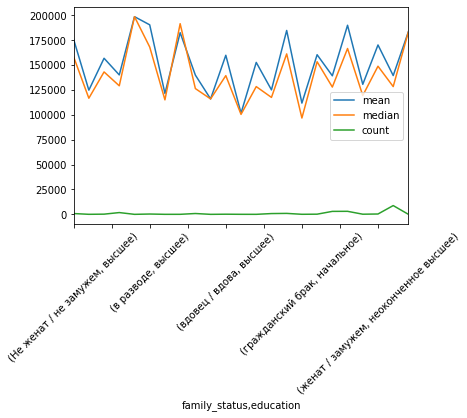

In [68]:
raw_data.groupby(['family_status', 'education'])['total_income'].agg(['mean', 'median', 'count']).plot(rot = 45)

#### Вывод

Определено, что у человека, взявшего кредит на машину, самые высокие шансы его не вернуть. И напротив, люди, взявшие кредит на недвижимость или жилье, выплачивают кредиты регулярнее.

<a id='Часть 4. Общий вывод'></a>

### Часть 4. Общий вывод

Таким образом, была выполнена работа по поиску необходимой информации на основе предоставленного датафрейма. 

В первую очередь было произведено импортирование необходимых библиотек, загрузка датафрейма и получение о нем общей информации. Уже на этом этапе в данных обнаружились проблемы, такие как отрицательные значения стажа работы и количества детей, пропуски, нулевые значения там, где их быть не должно.

Для устранения этих дефектов данных в первую очередь была произведена обработка пропусков, затем замена некоторых типов данных, обработка дубликатов, лемматизация, для выявления ключевых слов в целях кредита, и, наконец, категоризация данных. В процессе работы были применены необходимые методы и атрибуты, а также написано несколько функций, там где методов и атрибутов не нашлось. Подробнее о каждой опрерации по предобработке данных написано в соответствующем пункте работы.

Опираясь на предоставленные данные идеальный вариант у нас это вдовец/вдова, без детей, с целью купить жилье, при этом уровень доходов не принципиален. А худший вариант выглядит как человек не замужем либо в гражданском браке, с двумя детьми, берущий кредит на автомобиль или образование. 

Общая картина представлена в таблице ниже.

In [65]:
united_answer = pd.concat([answer_lemmas, answer_total_income, answer_family_status, answer_children], axis = 1, sort = False, \
               keys=['% невозврата', '% невозврата', '% невозврата', '% невозврата'], \
               names = ['категория']).round(decimals=3).fillna('-')
united_answer

категория,% невозврата,% невозврата,% невозврата,% невозврата
автомобиль,9.359,-,-,-
образование,9.22,-,-,-
свадьба,8.003,-,-,-
недвижимость,7.463,-,-,-
жилье,6.906,-,-,-
средний,-,8.746,-,-
ниже среднего,-,7.981,-,-
выше среднего,-,7.067,-,-
Не женат / не замужем,-,-,9.751,-
гражданский брак,-,-,9.347,-
